# 1 - Reading the Dataset
Download and load the dataset from the following link:
https://www.kaggle.com/mirichoi0218/insurance/download

# 2 -  Preprocessing
Perform any needed pre-processing on the chosen features including:  
Scaling.  
Encoding.  
Dealing with Nan values.  
Normalization.

In [1]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [3]:
#scaler = StandardScaler()
#df[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'children', 'charges']])
#df.head()

# 3 - Feature Selection
Look again at the features in your dataset. Decide if some of the features should be dropped for better clustering.

Keep all features since they can be relevant

# 4 - Clustering
Use k-means and Mean-shift to fit your data.  
Get optimal k for k-means using the elbow curve method.  
Try different bandwidth for the mean-shift clustering.

### Use k-means fit your data. 

In [4]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
import numpy as np

# Using the elbow curve method to find the optimal k for k-means

scores = []
cluster= range(1,25)

for k in cluster:
    model = KMeans(n_clusters = k, random_state=0)
    model.fit(df)
    scores.append(model.inertia_)
print(scores)


[196074539341.69006, 48015233363.63152, 23039892980.37825, 12124928462.891361, 8541856826.180521, 6166400411.423079, 4435985626.994258, 3493741183.471066, 2781326935.680221, 2251615951.666142, 1841047702.8972116, 1498762488.6973872, 1277891845.0759096, 1095248216.9782047, 918327525.5127664, 828134097.2167001, 751757597.9642363, 677145958.9452217, 594663070.5797197, 571996801.228929, 499075667.8440841, 449061751.48130226, 410785086.619375, 382188388.61888826]


### Get optimal k for k-means using the elbow curve method.

Text(0, 0.5, 'SSE')

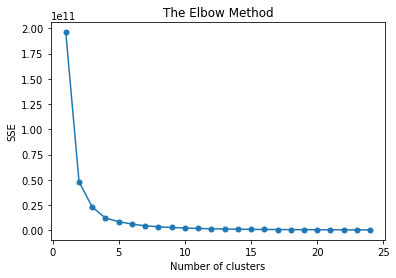

In [5]:
plt.plot(cluster, scores, marker='.', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Refit model using K = 3

In [10]:
clusters = KMeans(n_clusters = 4, tol = 0.01, random_state = 0).fit_predict(df)
df["clusters"] = clusters.tolist()
df.head()

,age,sex,bmi,children,smoker,region,charges,clusters
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,2
4,32,1,28.880,0,0,1,3866.85520,0


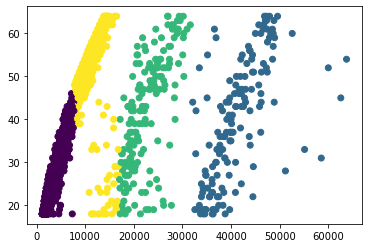

In [11]:
plt.scatter(df["charges"], df["age"], c = df.clusters)

### Use Mean-shift to fit your data.
Try different bandwidth for the mean-shift clustering.

In [12]:
from sklearn.cluster import MeanShift

bandwidth = 10

mean_shift= MeanShift(bandwidth = bandwidth)
mean_shift.fit(df)
clusters_mean_shift = mean_shift.predict(df)

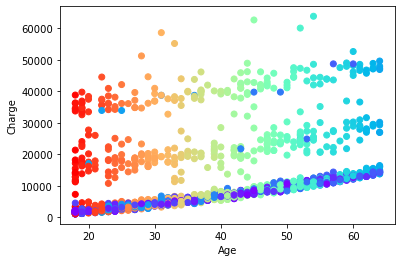

In [13]:
plt.scatter(df["age"], df["charges"], c=clusters_mean_shift, cmap="rainbow")
plt.xlabel('Age')
plt.ylabel('Charge')
plt.show()

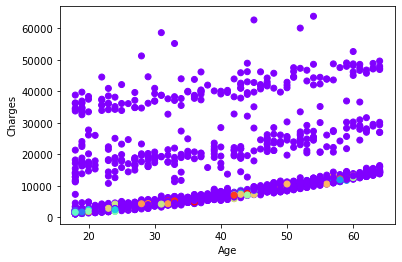

In [22]:
#Could try the density based classification to see 
#if it splits the central group with the highest density of points

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=9.25, min_samples = 4)
clusters = dbscan.fit_predict(df)

# plot the cluster assignments
plt.scatter(df["age"], df["charges"], c=clusters, cmap="rainbow")

plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()
